# Разные способы получения числа категорий

2017, Александр Дьяконов

http://alexanderdyakonov.wordpress.com/

In [1]:
import pandas as pd
import numpy as np

import matplotlib as plt
%pylab inline

plt.style.use('seaborn-darkgrid')


Populating the interactive namespace from numpy and matplotlib


/home/alexander/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [20]:
df = pd.DataFrame({'feature': ['London', 'Moscow', 'Paris', 'London', 'London', 'Moscow']})
df

,feature
0,London
1,Moscow
2,Paris
3,London
4,London
5,Moscow


### Разные способы получения словаря числа вхождений категорий

In [21]:
def pandas_vc(lst):
    """
    просто - value_counts
    """
    return (lst.value_counts().to_dict())

pandas_vc(df.feature)

{'London': 3, 'Moscow': 2, 'Paris': 1}

In [4]:
# МОЖНО ЕЩЁ ТАК!!!
df.groupby('feature')['feature'].count().to_dict()

{'London': 3, 'Moscow': 2, 'Paris': 1}

In [5]:
def clear_python_vc(lst):
    """
    средствами питона
    """
    result = {}
    for key in lst:
        if key not in result:
            result[key] = 0
        result[key] += 1
    return (result)

clear_python_vc(df.feature)

{'London': 3, 'Moscow': 2, 'Paris': 1}

In [6]:
from collections import defaultdict

def collections_vc(lst):
    """
    чуть улучшенный питоновский способ
    """    
    result = defaultdict(int)
    for key in lst:
        result[key] += 1
    return dict(result)

collections_vc(df.feature)

{'London': 3, 'Moscow': 2, 'Paris': 1}

In [7]:
def numpy_vc(lst):
    """
    Костыльный способ с numpy
    """
    return {val: np.sum(lst == val) for val in np.unique(lst)} # ТУТ ЕСТЬ ЛАЖА!!!
    

numpy_vc(df.feature)

{'London': 3, 'Moscow': 2, 'Paris': 1}

In [8]:
# unique
def unique_vc(lst):
    """
    Используем unique
    """    
    uniques, count = np.unique(lst, return_counts=True)
    return (dict({u: c for u, c in zip(uniques, count)}))

unique_vc(df.feature)

{'London': 3, 'Moscow': 2, 'Paris': 1}

In [9]:
# Получаем не совсем словарь

from collections import Counter
Counter(df.feature) # Counter({'blue': 3, 'red': 2, 'yellow': 1})

Counter({'London': 3, 'Moscow': 2, 'Paris': 1})

## методы с ограничениями

In [11]:
lst = [1,2,0,1,1,0,2,2,2]

def bincount_vc(lst):
    """
    только для списков с ЦЕЛЫМИ числами
    """
    return({t: x for t, x in enumerate(np.bincount(lst))})

bincount_vc(lst)

{0: 2, 1: 3, 2: 4}

In [12]:
lst = [1,2,0,1,1,0,2,2,2]

def count_vc(lst):
    """
    только для списков с ЦЕЛЫМИ числами
    """    
    return({x: lst.count(x) for x in set(lst)})

count_vc(lst)

{0: 2, 1: 3, 2: 4}

## численные эксперименты

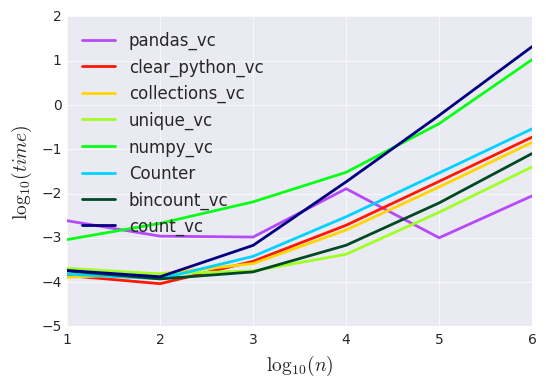

In [178]:
from time import time

for t, f in enumerate([pandas_vc, clear_python_vc, collections_vc,  unique_vc, numpy_vc, Counter, bincount_vc, count_vc]):
    times = []
    ns = [10, 100, 1000, 10000, 100000, 1000000] #
    
    try:
        label = f.func_name
    except:
        label='Counter'
        
    for n in ns:
        m = int(np.sqrt(n))
        lst = np.random.choice(np.arange(m), n)
        df = pd.DataFrame({'feature': lst})
        tm = time()
        if label in {'bincount_vc', 'count_vc'}:
            dct = f(df.feature.astype(int).tolist())
        else:
            dct = f(df.feature)
        tm = time() - tm
        times.append(tm)
        

        
    
    plt.plot(np.log10(np.array(ns)), np.log10(times), label=label, lw=2, c=cm.gist_ncar_r(35*(t+1)))
    
plt.xlabel(r'$\log_{10}(n)$', fontsize=14)
plt.ylabel(r'$\log_{10}(time)$', fontsize=14)
plt.legend(loc='best')

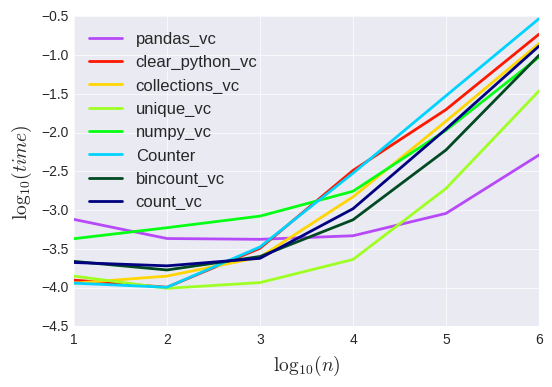

In [33]:
from time import time

for t, f in enumerate([pandas_vc, clear_python_vc, collections_vc,  unique_vc, numpy_vc, Counter, bincount_vc, count_vc]):
    times = []
    ns = [10, 100, 1000, 10000, 100000, 1000000] #
    
    try:
        label = f.func_name
    except:
        label='Counter'
        
    for n in ns:
        m = int(np.log10(n))
        lst = np.random.choice(np.arange(m), n)
        df = pd.DataFrame({'feature': lst})
        tm = time()
        if label in {'bincount_vc', 'count_vc'}:
            dct = f(df.feature.astype(int).tolist())
        else:
            dct = f(df.feature)
        tm = time() - tm
        times.append(tm)
        

        
    
    plt.plot(np.log10(np.array(ns)), np.log10(times), label=label, lw=2, c=cm.gist_ncar_r(35*(t+1)))
    
plt.xlabel(r'$\log_{10}(n)$', fontsize=14)
plt.ylabel(r'$\log_{10}(time)$', fontsize=14)
plt.legend(loc='best')

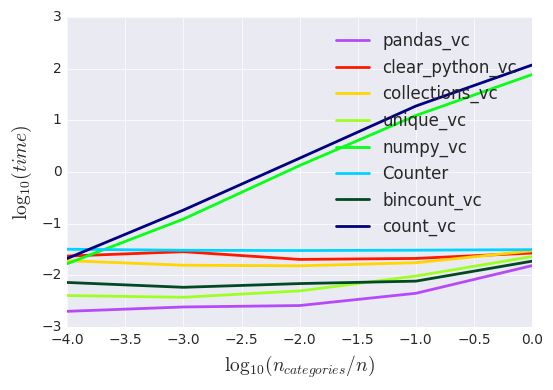

In [179]:
from time import time

import matplotlib.cm as cm


for t, f in enumerate([pandas_vc, clear_python_vc, collections_vc,  unique_vc, numpy_vc, Counter, bincount_vc, count_vc]):
    times = []
    n = 100000
    ms = [10.0, 100.0, 1000.0, 10000.0, 100000.0] # 1000000
    
    try:
        label = f.func_name
    except:
        label='Counter'
        
    for m in ms:
        lst = np.random.choice(np.arange(m), n)
        df = pd.DataFrame({'feature': lst})
        tm = time()
        if label in {'bincount_vc', 'count_vc'}:
            dct = f(df.feature.astype(int).tolist())
        else:
            dct = f(df.feature)
        tm = time() - tm
        times.append(tm)
        

        
    
    plt.plot(np.log10(np.array(ms)/n), np.log10(times), label=label, lw=2, c=cm.gist_ncar_r(35*(t+1)))
    

plt.xlabel(r'$\log_{10}(n_{categories} / n)$', fontsize=14)
plt.ylabel(r'$\log_{10}(time)$', fontsize=14)

plt.legend(loc='best')

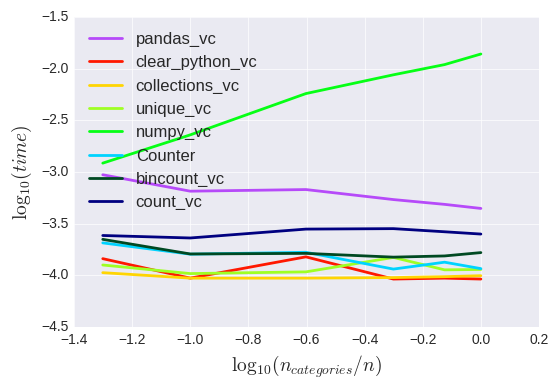

In [18]:
from time import time

import matplotlib.cm as cm


for t, f in enumerate([pandas_vc, clear_python_vc, collections_vc,  unique_vc, numpy_vc, Counter, bincount_vc, count_vc]):
    times = []
    n = 100
    ms = [5., 10., 25., 50., 75., 100.] # 1000000
    
    try:
        label = f.func_name
    except:
        label='Counter'
        
    for m in ms:
        lst = np.random.choice(np.arange(m), n)
        df = pd.DataFrame({'feature': lst})
        tm = time()
        if label in {'bincount_vc', 'count_vc'}:
            dct = f(df.feature.astype(int).tolist())
        else:
            dct = f(df.feature)
        tm = time() - tm
        times.append(tm)
        

        
    
    plt.plot(np.log10(np.array(ms)/n), np.log10(times), label=label, lw=2, c=cm.gist_ncar_r(35*(t+1)))
    

plt.xlabel(r'$\log_{10}(n_{categories} / n)$', fontsize=14)
plt.ylabel(r'$\log_{10}(time)$', fontsize=14)

plt.legend(loc='best')

# TRASH

(0.0, 0.5, 0.40000000000000002, 1.0)
(0.11764705882352941, 0.55882352941176472, 0.40000000000000002, 1.0)
(0.23529411764705882, 0.61764705882352944, 0.40000000000000002, 1.0)
(0.3529411764705882, 0.67647058823529416, 0.40000000000000002, 1.0)
(0.47058823529411764, 0.73529411764705888, 0.40000000000000002, 1.0)
(0.58823529411764708, 0.79411764705882359, 0.40000000000000002, 1.0)
(0.70588235294117641, 0.8529411764705882, 0.40000000000000002, 1.0)
(0.82352941176470584, 0.91176470588235292, 0.40000000000000002, 1.0)


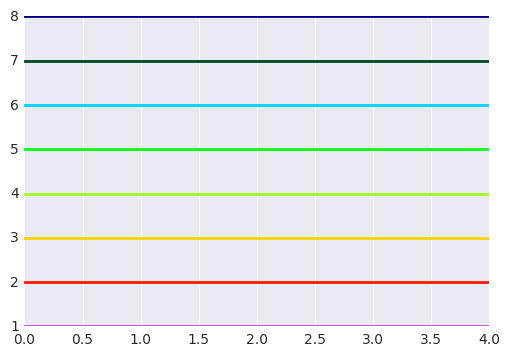

In [177]:
mpl.rcParams['text.usetex'] = False
# mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] 


for t, f in enumerate([1,2,3,4,5,6,7,8]): # Counter numpy_vc,
    plt.plot(np.zeros(5) + f,  lw=2, c=cm.gist_ncar_r(35*(t+1)))
    print (cm.summer(30*t))

#plt.title(r"$f_{\text{cor, r}}$")

In [ ]:
df['v_c'] = df.feature.map(df.feature.value_counts())
df